In [46]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')  # or 'Qt5Agg'
%matplotlib inline
import seaborn as sns
import plotly.express as px
plt.close('all')

In [47]:
debt = pd.read_csv("Publicdebt.csv")
print(debt.head())

   Year Month   Domestic Debt    External Debt     Total 
0  1999   Sep        183417.00       320137.00  503554.00
1  1999   Dec        190300.00       311953.00  502253.00
2  2000   Mar        201463.22       396800.00  598263.22
3  2000   Jun        206127.00       395694.00  601821.00
4  2000   Jul        202362.00       394667.37  597029.37


In [48]:
# Display the entire DataFrame (if it's not too large)
print(debt)


     Year Month   Domestic Debt    External Debt       Total 
0    1999   Sep        183417.00       320137.00    503554.00
1    1999   Dec        190300.00       311953.00    502253.00
2    2000   Mar        201463.22       396800.00    598263.22
3    2000   Jun        206127.00       395694.00    601821.00
4    2000   Jul        202362.00       394667.37    597029.37
..    ...   ...              ...             ...          ...
284  2023   Nov       4990750.73      5896502.32  10887253.05
285  2023   Dec       5050108.54      6089584.98  11139693.52
286  2024   Jan       5050442.00      6189967.47  11240409.47
287  2024   Feb       5200211.07      5653894.01  10854105.08
288  2024   Mar       5235188.41      5163423.34  10398611.75

[289 rows x 5 columns]


In [49]:
# Strip any leading or trailing spaces from column names
debt.columns = debt.columns.str.strip()

# Now, check the column names to ensure they've been cleaned
print(debt.columns)

# Perform the rest of the cleaning
debt['Domestic Debt'] = pd.to_numeric(debt['Domestic Debt'], errors='coerce')
debt['External Debt'] = pd.to_numeric(debt['External Debt'], errors='coerce')
debt['Total'] = pd.to_numeric(debt['Total'], errors='coerce')

# Check if the conversion worked and look at the data types
print(debt.dtypes)

Index(['Year', 'Month', 'Domestic Debt', 'External Debt', 'Total'], dtype='object')
Year               int64
Month             object
Domestic Debt    float64
External Debt    float64
Total            float64
dtype: object


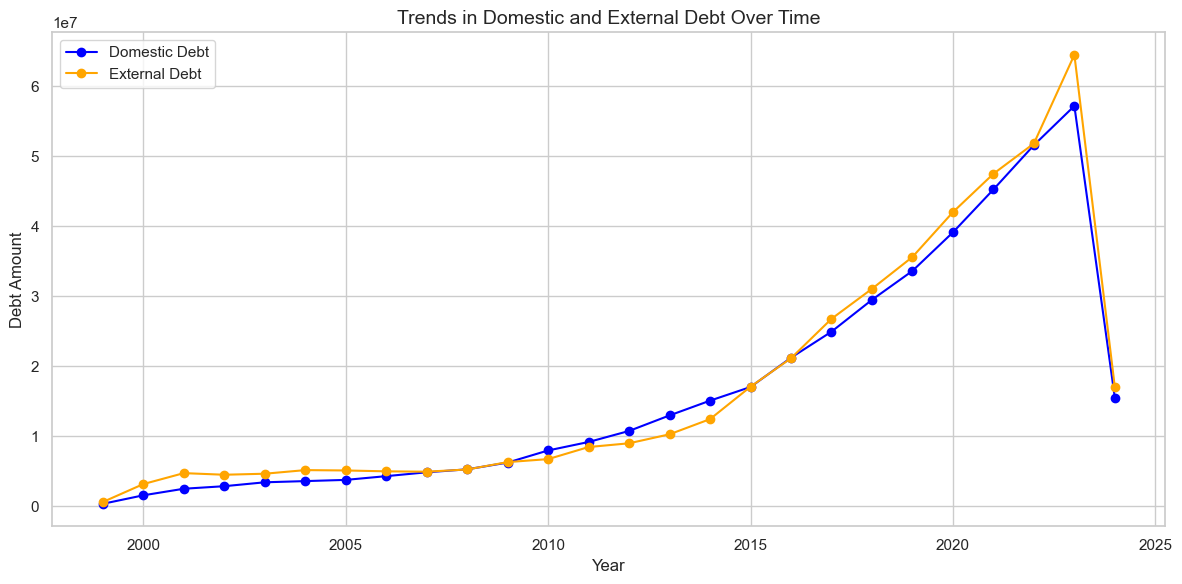

In [50]:
# First, convert the 'Year' column to a numeric type, if it's not already
debt['Year'] = pd.to_numeric(debt['Year'], errors='coerce')

# Group the data by year and sum the debt values to get the yearly total
debt_by_year = debt.groupby('Year').agg({
    'Domestic Debt': 'sum',
    'External Debt': 'sum'
}).reset_index()

# Plotting the trends
plt.figure(figsize=(12, 6))

# Plot Domestic Debt
plt.plot(debt_by_year['Year'], debt_by_year['Domestic Debt'], label='Domestic Debt', color='blue', marker='o')

# Plot External Debt
plt.plot(debt_by_year['Year'], debt_by_year['External Debt'], label='External Debt', color='orange', marker='o')

# Adding labels and title
plt.title('Trends in Domestic and External Debt Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Debt Amount', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.savefig('Debt Amount.png', dpi=300, bbox_inches='tight')  # Save as Pdf with high resolution
plt.show()

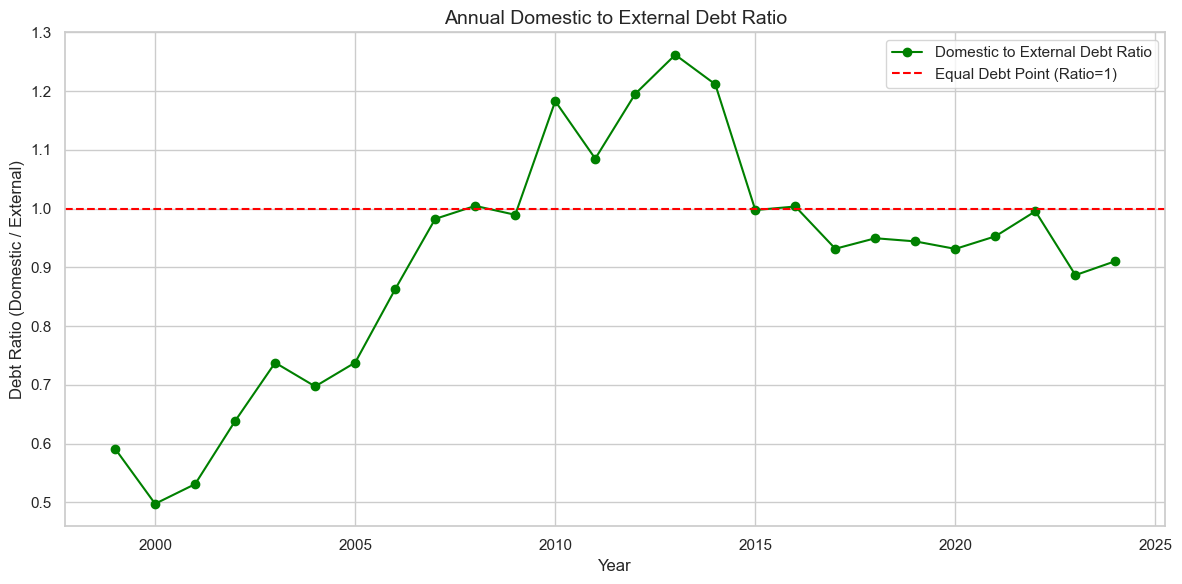

In [51]:
# Compute the domestic to external debt ratio
debt_by_year['Debt Ratio'] = debt_by_year['Domestic Debt'] / debt_by_year['External Debt']

# Plotting the Debt Ratio
plt.figure(figsize=(12, 6))

# Line plot for the Debt Ratio
plt.plot(debt_by_year['Year'], debt_by_year['Debt Ratio'], label='Domestic to External Debt Ratio', color='green', marker='o')

# Add a horizontal line at y=1 to indicate the point where domestic debt equals external debt
plt.axhline(y=1, color='red', linestyle='--', label='Equal Debt Point (Ratio=1)')

# Adding labels and title
plt.title('Annual Domestic to External Debt Ratio', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Debt Ratio (Domestic / External)', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.savefig('Debt Ratio.png', dpi=300, bbox_inches='tight')
plt.show()


    Year  Domestic Debt  External Debt
0   1999      373717.00      632090.00
1   2000     1586191.52     3188942.94
2   2001     2523171.72     4752392.05
3   2002     2886669.19     4521607.96
4   2003     3442967.19     4667506.61
5   2004     3613737.77     5182974.80
6   2005     3786925.93     5132453.80
7   2006     4320247.93     5007444.18
8   2007     4871792.99     4958771.27
9   2008     5295986.39     5271713.50
10  2009     6260162.74     6327093.33
11  2010     7989837.60     6754527.68
12  2011     9198353.92     8477400.03
13  2012    10773682.03     9012480.59
14  2013    12992446.33    10296335.21
15  2014    15099067.66    12462559.16
16  2015    17049324.85    17091920.86
17  2016    21230103.62    21154785.79
18  2017    24947757.85    26778818.61
19  2018    29494330.50    31061971.85
20  2019    33624513.11    35613579.71
21  2020    39127833.28    42011199.52
22  2021    45245253.62    47485323.27
23  2022    51574258.85    51810671.76
24  2023    57171337.82  

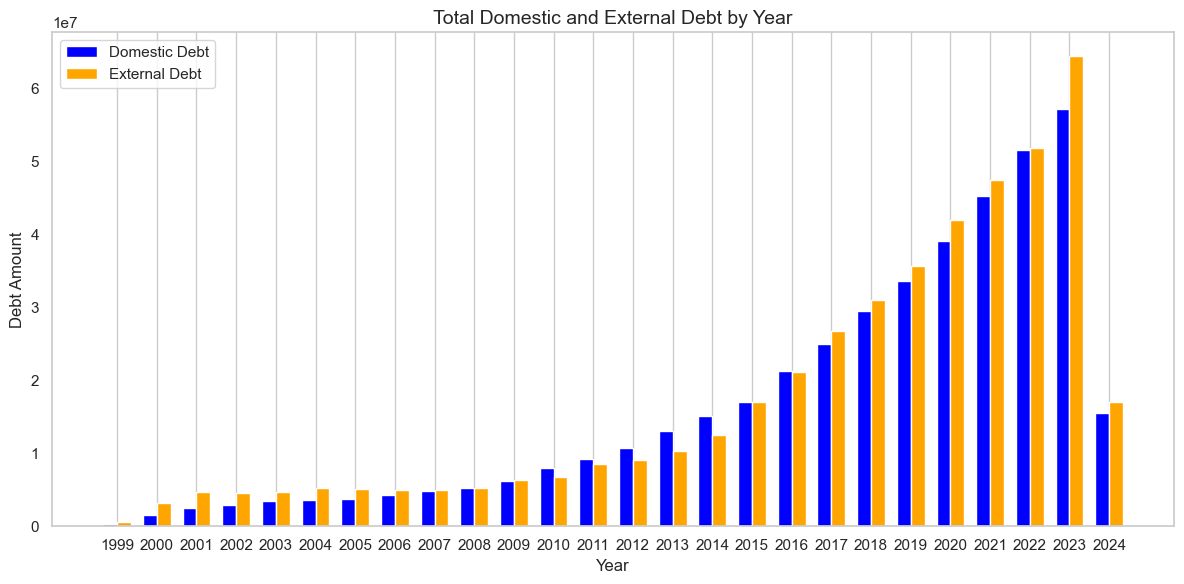

In [52]:
# Group by year and calculate the sum of domestic and external debt
debt_by_year = debt.groupby('Year').agg({
    'Domestic Debt': 'sum',
    'External Debt': 'sum'
}).reset_index()

# Print the resulting DataFrame to verify the years and data
print(debt_by_year)

# Plotting the total domestic and external debt by year using a bar plot
plt.figure(figsize=(12, 6))

# Bar width
bar_width = 0.35

# Set positions of the bars
x = np.arange(len(debt_by_year['Year']))

# Plotting domestic debt bars
plt.bar(x - bar_width/2, debt_by_year['Domestic Debt'], width=bar_width, label='Domestic Debt', color='blue')

# Plotting external debt bars
plt.bar(x + bar_width/2, debt_by_year['External Debt'], width=bar_width, label='External Debt', color='orange')

# Adding labels and title
plt.title('Total Domestic and External Debt by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Debt Amount', fontsize=12)
plt.xticks(ticks=x, labels=debt_by_year['Year'])
plt.legend()
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


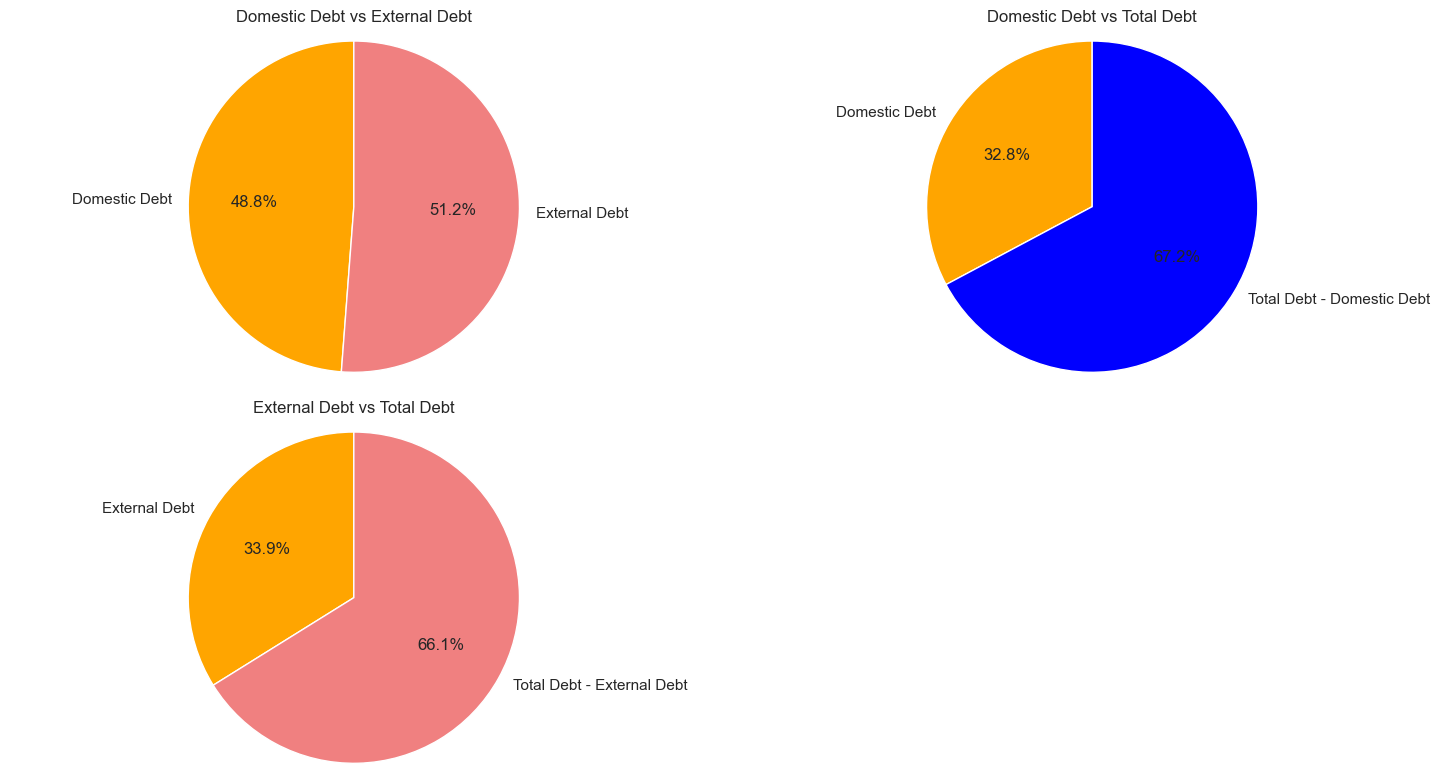

In [53]:
# Calculate total debt
debt['Total Debt'] = debt['Domestic Debt'] + debt['External Debt']

# Aggregate total domestic and external debt
total_domestic_debt = debt['Domestic Debt'].sum()
total_external_debt = debt['External Debt'].sum()
total_debt = total_domestic_debt + total_external_debt

# Create the pie charts
plt.figure(figsize=(15, 8))

# First Pie Chart: Domestic Debt vs External Debt
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
plt.pie([total_domestic_debt, total_external_debt],
        labels=['Domestic Debt', 'External Debt'],
        autopct='%1.1f%%', startangle=90, colors=['orange', 'lightcoral'])
plt.title('Domestic Debt vs External Debt')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Second Pie Chart: Domestic Debt vs Total Debt
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
plt.pie([total_domestic_debt, total_debt],
        labels=['Domestic Debt', 'Total Debt - Domestic Debt'],
        autopct='%1.1f%%', startangle=90, colors=['orange', 'blue'])
plt.title('Domestic Debt vs Total Debt')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Third Pie Chart: External Debt vs Total Debt
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
plt.pie([total_external_debt, total_debt],
        labels=['External Debt', 'Total Debt - External Debt'],
        autopct='%1.1f%%', startangle=90, colors=['orange', 'lightcoral'])
plt.title('External Debt vs Total Debt')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout to make space for titles
plt.tight_layout()
plt.savefig('Debt decomposition.png', dpi=300, bbox_inches='tight')
plt.show()


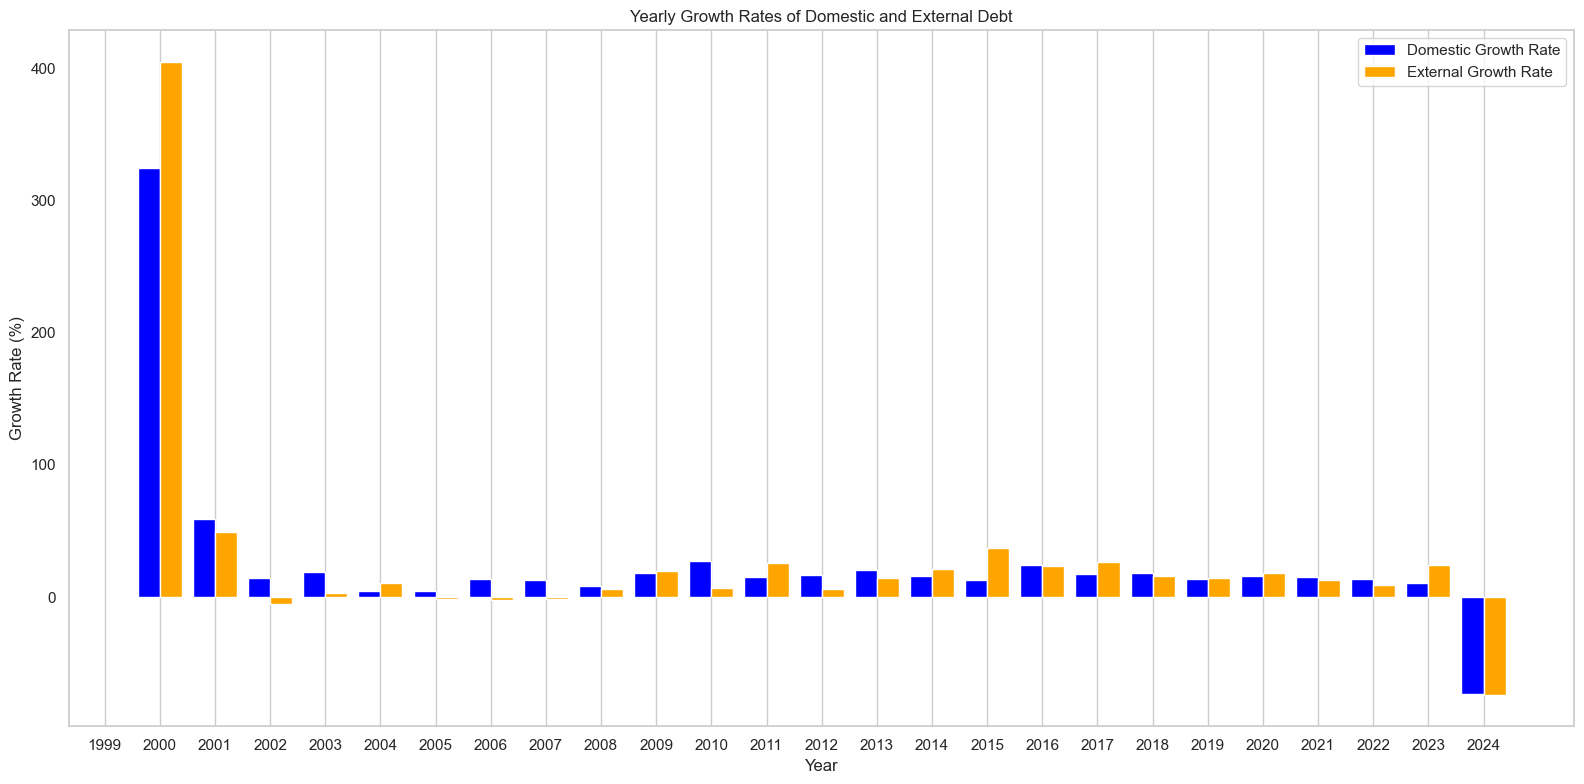

In [54]:
# Group by Year and calculate totals
annual_debt = debt.groupby('Year').agg({
    'Domestic Debt': 'sum',
    'External Debt': 'sum'
}).reset_index()

annual_debt['Domestic Growth Rate'] = annual_debt['Domestic Debt'].pct_change() * 100
annual_debt['External Growth Rate'] = annual_debt['External Debt'].pct_change() * 100

plt.figure(figsize=(16, 8))
plt.bar(annual_debt['Year'] - 0.2, annual_debt['Domestic Growth Rate'], width=0.4, label='Domestic Growth Rate', color='blue')
plt.bar(annual_debt['Year'] + 0.2, annual_debt['External Growth Rate'], width=0.4, label='External Growth Rate', color='orange')
plt.title('Yearly Growth Rates of Domestic and External Debt')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.xticks(annual_debt['Year'])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


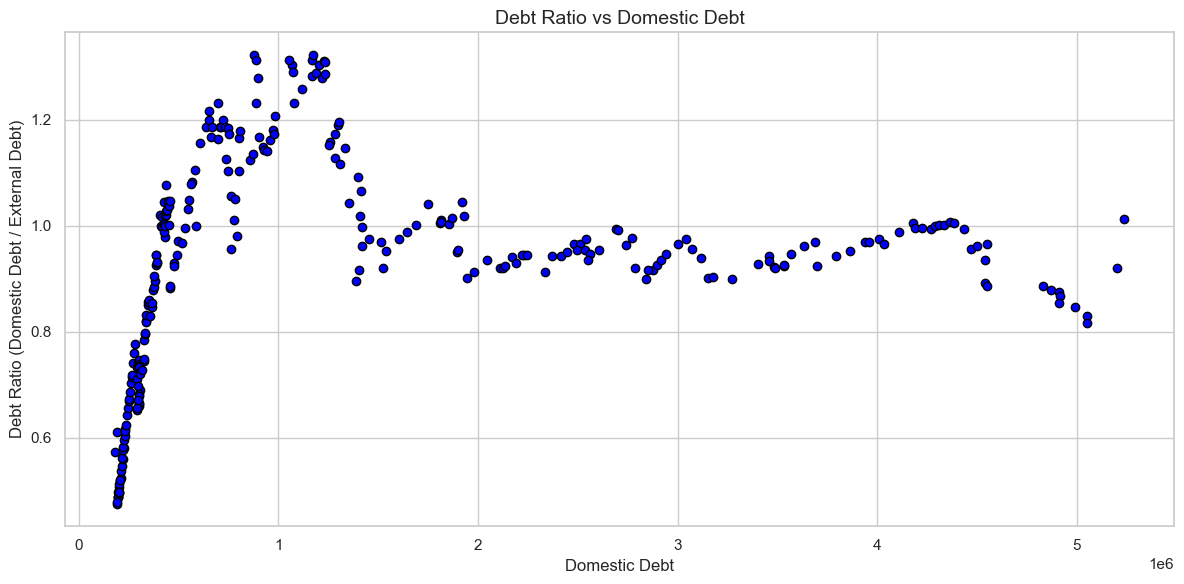

In [55]:
import matplotlib.pyplot as plt

# Ensure your DataFrame contains the necessary columns: 'Domestic Debt' and 'External Debt'

# Calculate the Debt Ratio (Domestic Debt / External Debt)
debt['Debt Ratio'] = debt['Domestic Debt'] / debt['External Debt']

# Create a scatter plot of Debt Ratio vs. Domestic Debt
plt.figure(figsize=(12, 6))

# Plot
plt.scatter(debt['Domestic Debt'], debt['Debt Ratio'], color='blue', edgecolors='black')

# Add labels and title
plt.title('Debt Ratio vs Domestic Debt', fontsize=14)
plt.xlabel('Domestic Debt', fontsize=12)
plt.ylabel('Debt Ratio (Domestic Debt / External Debt)', fontsize=12)

# Grid for better readability
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


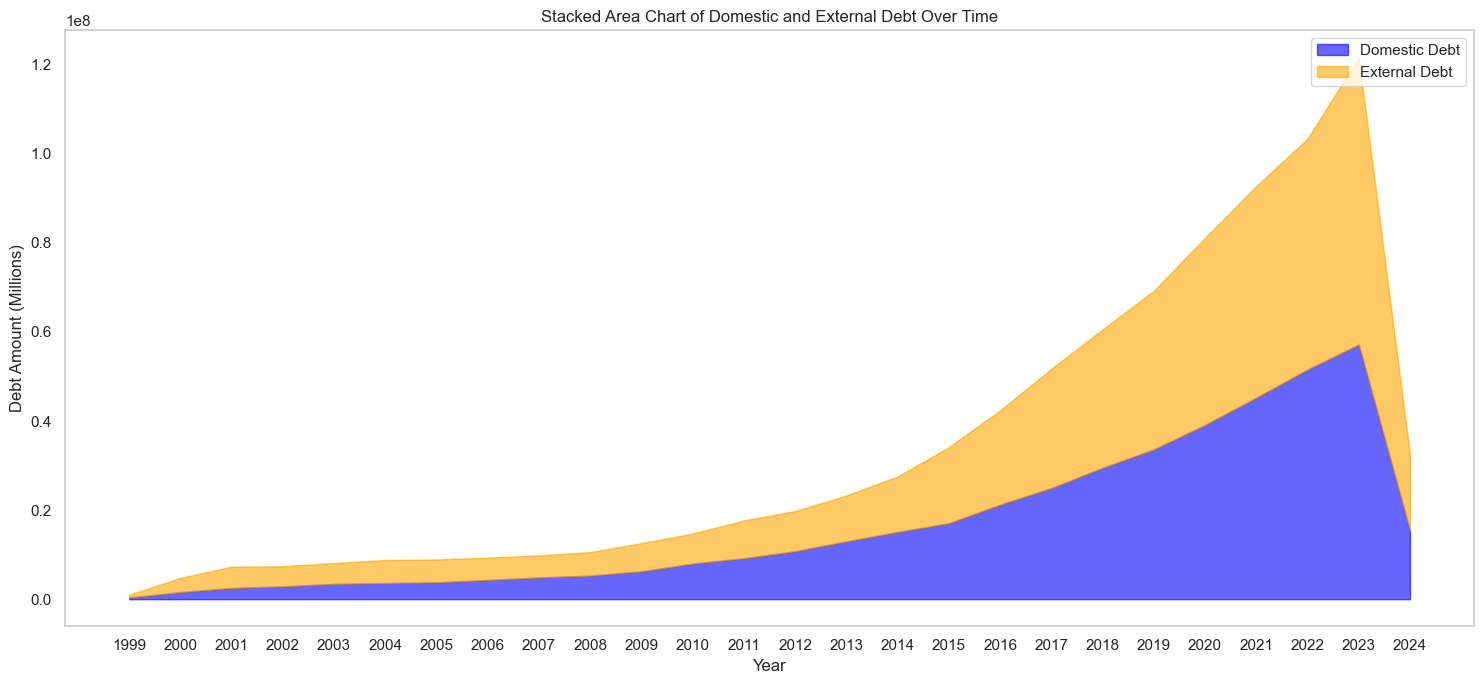

In [56]:
plt.figure(figsize=(15, 7))
plt.fill_between(annual_debt['Year'], annual_debt['Domestic Debt'], color='blue', alpha=0.6, label='Domestic Debt')
plt.fill_between(annual_debt['Year'], annual_debt['Domestic Debt'], annual_debt['Domestic Debt'] + annual_debt['External Debt'], color='orange', alpha=0.6, label='External Debt')
plt.title('Stacked Area Chart of Domestic and External Debt Over Time')
plt.xlabel('Year')
plt.ylabel('Debt Amount (Millions)')
plt.xticks(annual_debt['Year'])
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [57]:
gdp = pd.read_csv("Annual GDP.csv")

In [58]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              24 non-null     int64  
 1   Nominal GDP prices (Ksh Million)  24 non-null     float64
 2   Annual GDP growth (%)             24 non-null     float64
 3   Real GDP prices (Ksh Million)     24 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 900.0 bytes


In [59]:
gdp.describe()

,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million)
count,24.000000,2.400000e+01,24.000000,2.400000e+01
mean,2011.500000,5.558665e+06,4.320833,5.238001e+06
std,7.071068,4.391762e+06,2.214768,3.452537e+06
min,2000.000000,9.678380e+05,-0.300000,9.828550e+05
25%,2005.750000,1.570880e+06,3.575000,1.230298e+06
50%,2011.500000,4.464852e+06,4.950000,6.229327e+06
75%,2017.250000,8.697624e+06,5.600000,7.996864e+06
max,2023.000000,1.510881e+07,8.100000,1.039998e+07


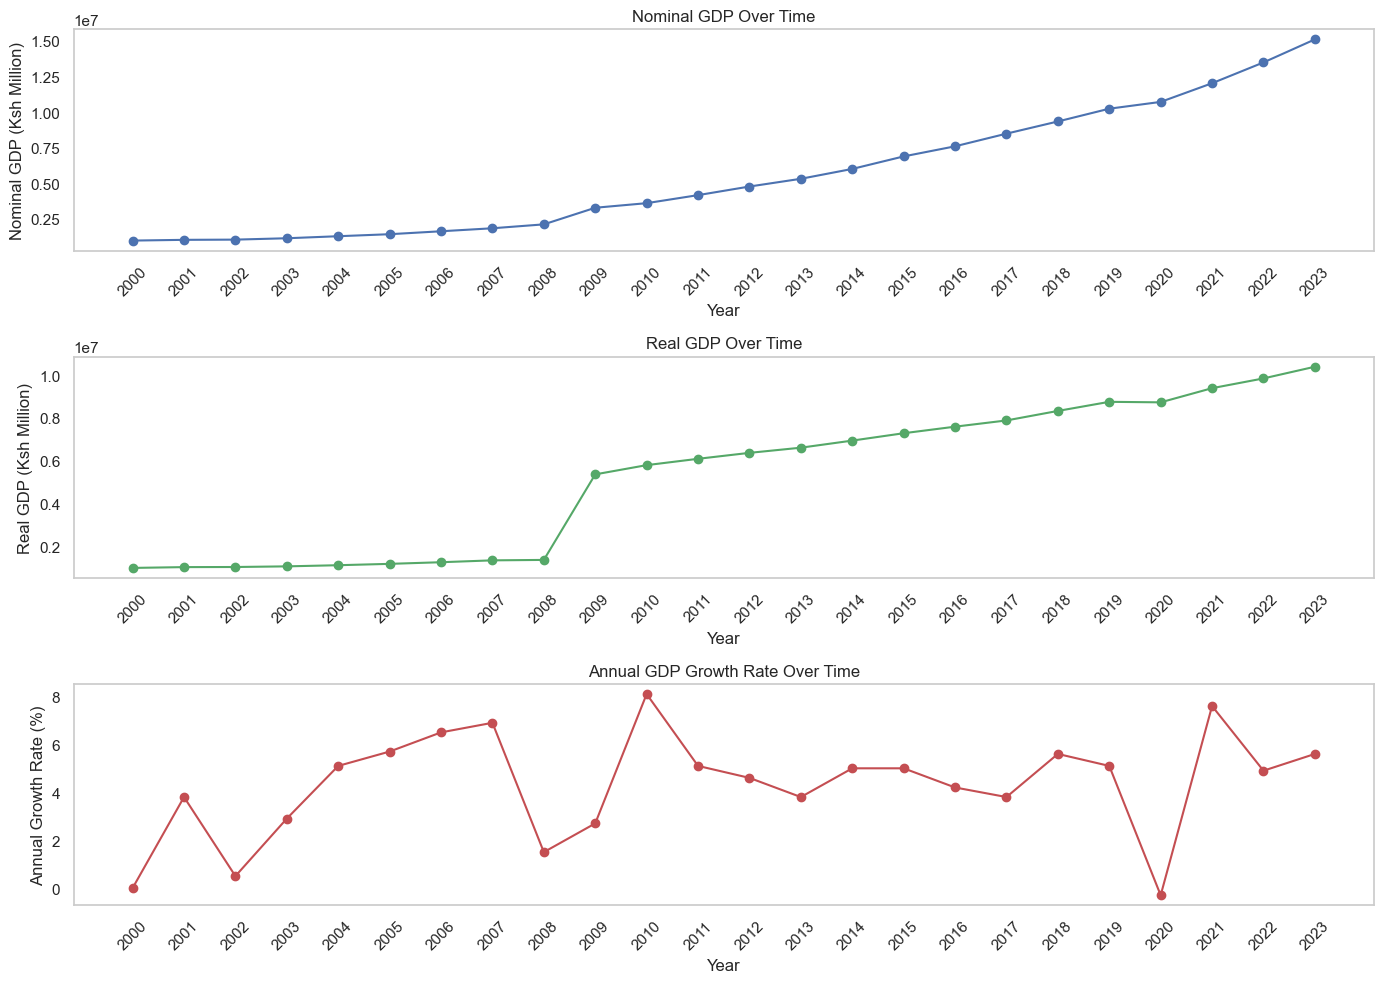

In [60]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(14, 10))

# 1. Line Plot of Nominal GDP Over Time
plt.subplot(3, 1, 1)
plt.plot(gdp['Year'], gdp['Nominal GDP prices (Ksh Million)'], marker='o', color='b')
plt.title('Nominal GDP Over Time')
plt.xlabel('Year')
plt.ylabel('Nominal GDP (Ksh Million)')
plt.xticks(gdp['Year'], rotation=45)
plt.grid()

# 2. Line Plot of Real GDP Over Time
plt.subplot(3, 1, 2)
plt.plot(gdp['Year'], gdp['Real GDP prices (Ksh Million)'], marker='o', color='g')
plt.title('Real GDP Over Time')
plt.xlabel('Year')
plt.ylabel('Real GDP (Ksh Million)')
plt.xticks(gdp['Year'], rotation=45)
plt.grid()

# 3. Line Plot of Annual GDP Growth Rate Over Time
plt.subplot(3, 1, 3)
plt.plot(gdp['Year'], gdp['Annual GDP growth (%)'], marker='o', color='r')
plt.title('Annual GDP Growth Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Annual Growth Rate (%)')
plt.xticks(gdp['Year'], rotation=45)
plt.grid()

# Adjust layout
plt.tight_layout()
plt.savefig('Annual Growth Rate.png', dpi=300, bbox_inches='tight')
plt.show()

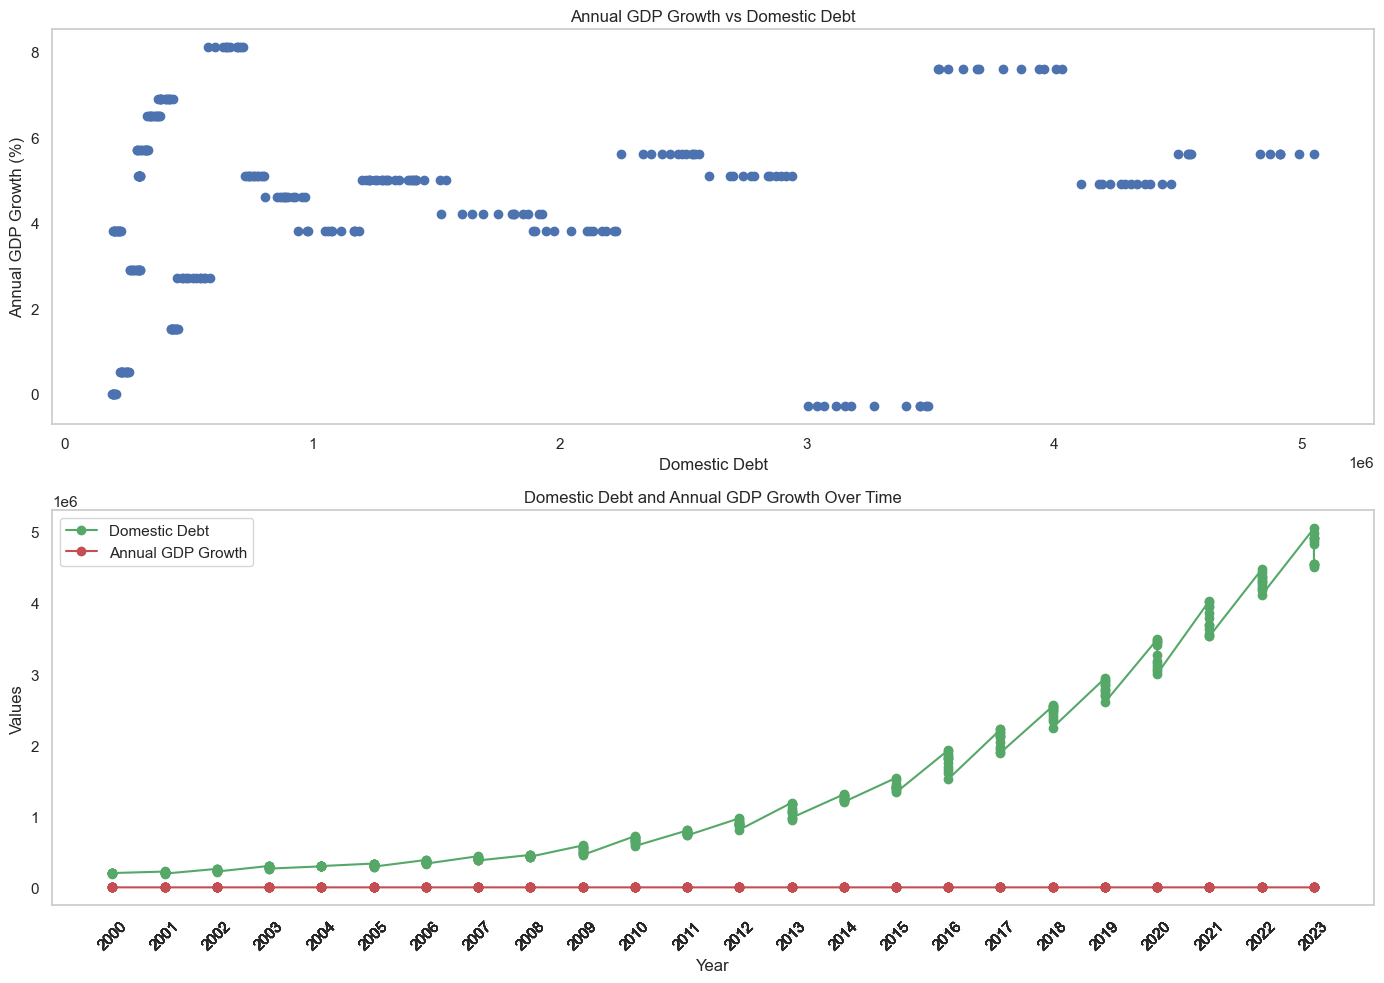

In [61]:
# Merge the two DataFrames on 'Year'
merged_df = pd.merge(gdp, debt, on='Year')

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(14, 10))

# Scatter Plot of Annual GDP Growth vs Domestic Debt
plt.subplot(2, 1, 1)
plt.scatter(merged_df['Domestic Debt'], merged_df['Annual GDP growth (%)'], color='b')
plt.title('Annual GDP Growth vs Domestic Debt')
plt.xlabel('Domestic Debt')
plt.ylabel('Annual GDP Growth (%)')
plt.grid()

# Line Plot of Domestic Debt and Annual GDP Growth Over Time
plt.subplot(2, 1, 2)
plt.plot(merged_df['Year'], merged_df['Domestic Debt'], marker='o', color='g', label='Domestic Debt')
plt.plot(merged_df['Year'], merged_df['Annual GDP growth (%)'], marker='o', color='r', label='Annual GDP Growth')
plt.title('Domestic Debt and Annual GDP Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Values')
plt.xticks(merged_df['Year'], rotation=45)
plt.legend()
plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()

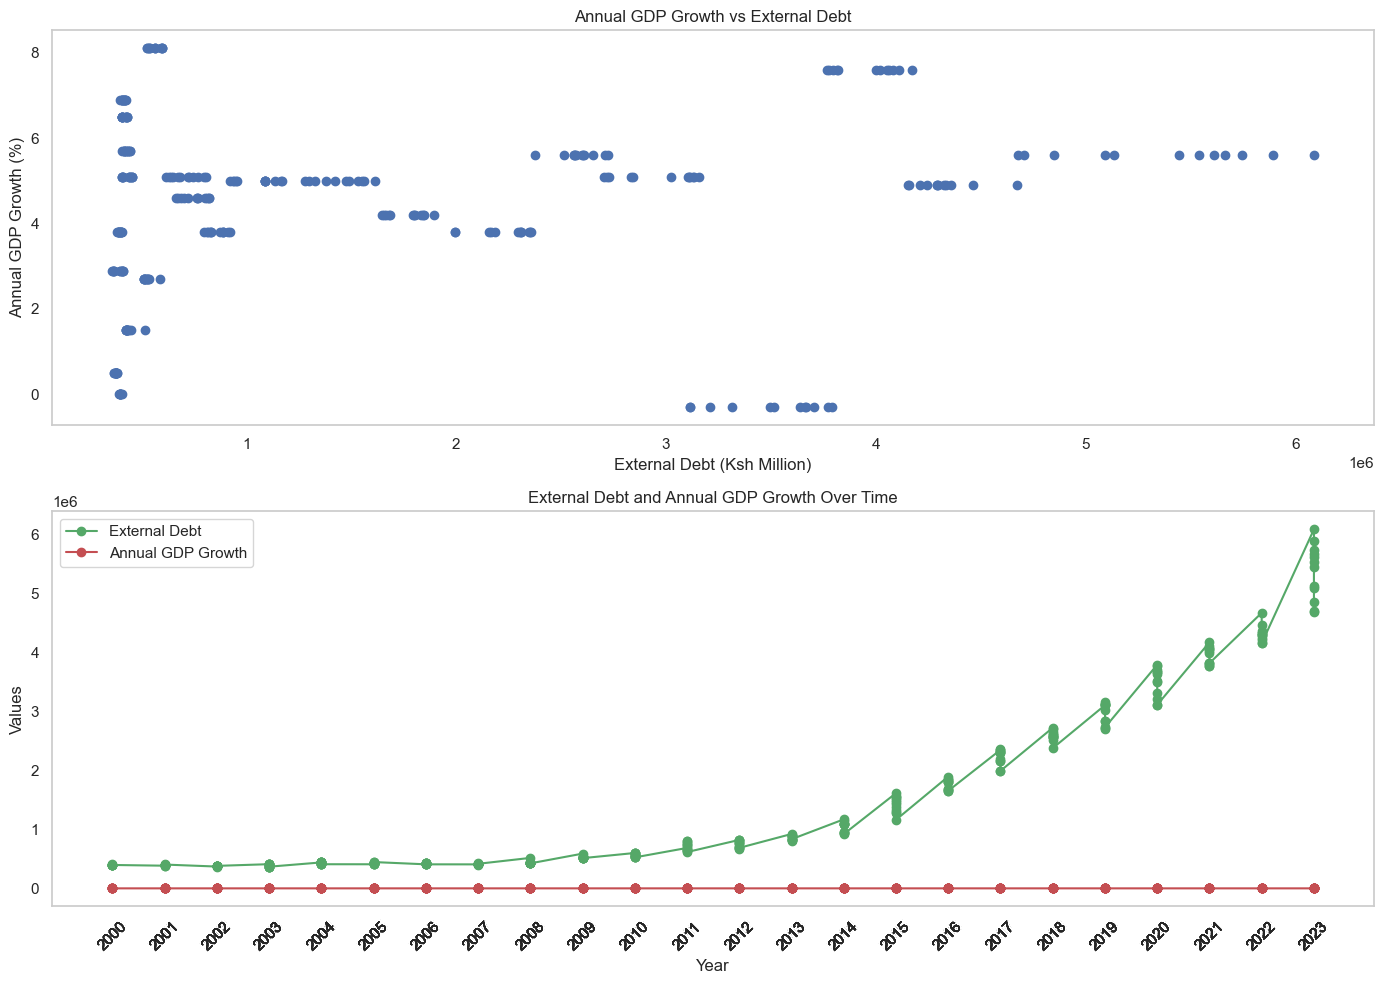

In [62]:
# Merge the two DataFrames on 'Year'
merged_df = pd.merge(gdp, debt, on='Year')

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(14, 10))

# Scatter Plot of Annual GDP Growth vs External Debt
plt.subplot(2, 1, 1)
plt.scatter(merged_df['External Debt'], merged_df['Annual GDP growth (%)'], color='b')
plt.title('Annual GDP Growth vs External Debt')
plt.xlabel('External Debt (Ksh Million)')
plt.ylabel('Annual GDP Growth (%)')
plt.grid()

# Line Plot of External Debt and Annual GDP Growth Over Time
plt.subplot(2, 1, 2)
plt.plot(merged_df['Year'], merged_df['External Debt'], marker='o', color='g', label='External Debt')
plt.plot(merged_df['Year'], merged_df['Annual GDP growth (%)'], marker='o', color='r', label='Annual GDP Growth')
plt.title('External Debt and Annual GDP Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Values')
plt.xticks(merged_df['Year'], rotation=45)
plt.legend()
plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()

In [63]:
# Calculate Debt-to-GDP ratios
merged_df['Domestic Debt to GDP (%)'] = (merged_df['Domestic Debt'] / merged_df['Nominal GDP prices (Ksh Million)']) * 100
merged_df['External Debt to GDP (%)'] = (merged_df['External Debt'] / merged_df['Nominal GDP prices (Ksh Million)']) * 100

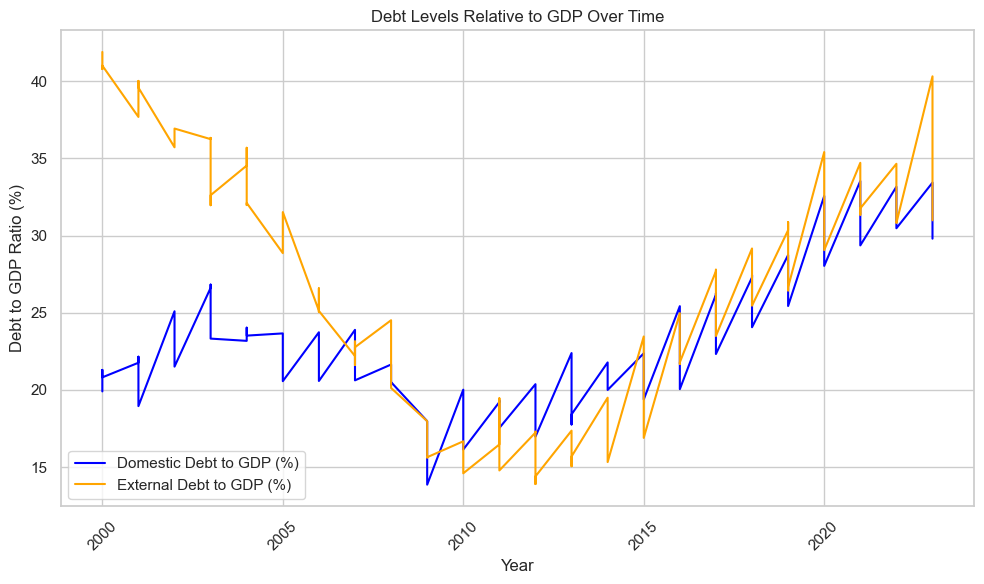

In [64]:
# Merge gdp and debt DataFrames on 'Year'
merged_df = pd.merge(gdp, debt, on='Year')

# Calculate Debt-to-GDP ratios
merged_df['Domestic Debt to GDP (%)'] = (merged_df['Domestic Debt'] / merged_df['Nominal GDP prices (Ksh Million)']) * 100
merged_df['External Debt to GDP (%)'] = (merged_df['External Debt'] / merged_df['Nominal GDP prices (Ksh Million)']) * 100

# Create a simple line plot
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Year'], merged_df['Domestic Debt to GDP (%)'], label='Domestic Debt to GDP (%)', color='blue')
plt.plot(merged_df['Year'], merged_df['External Debt to GDP (%)'], label='External Debt to GDP (%)', color='orange')
plt.title('Debt Levels Relative to GDP Over Time')
plt.xlabel('Year')
plt.ylabel('Debt to GDP Ratio (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('Debt to GDP Ratio.png', dpi=300, bbox_inches='tight')
plt.show()

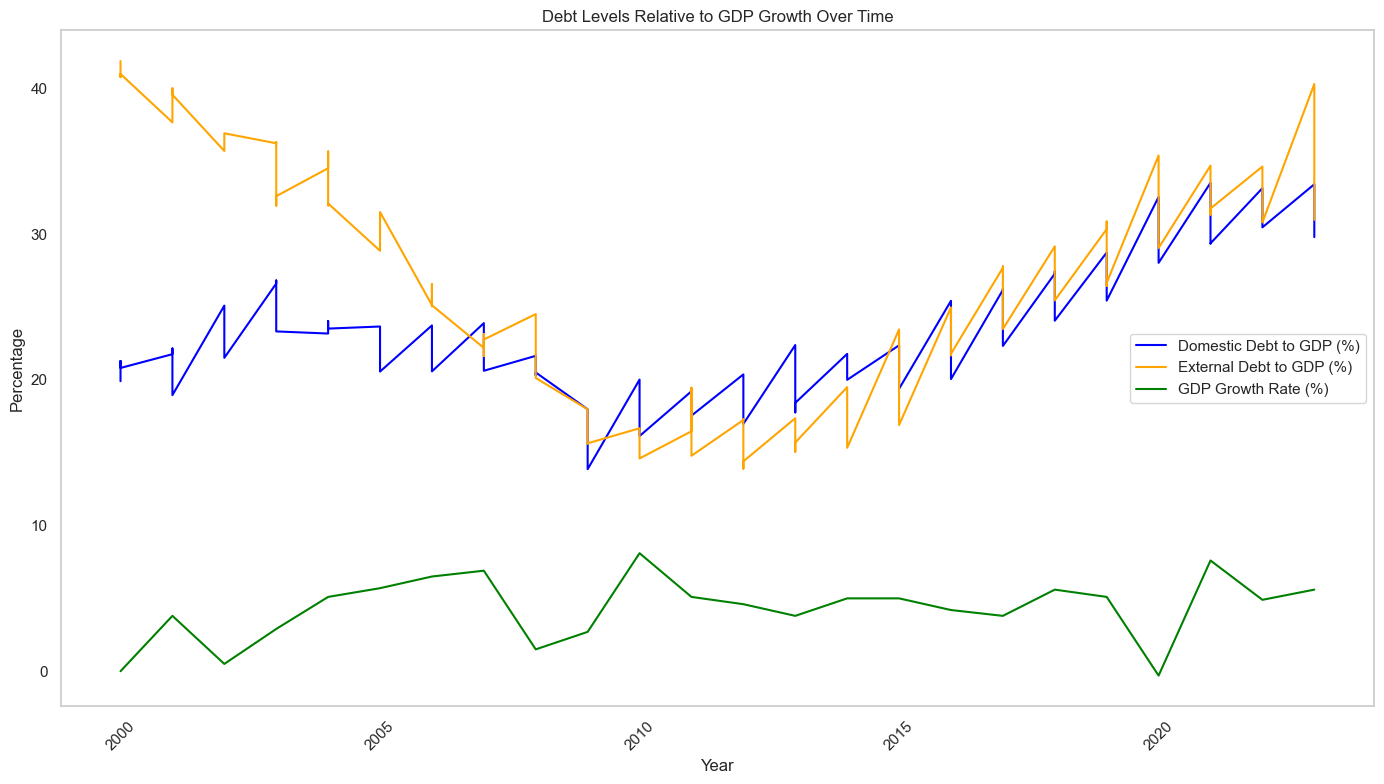

Correlation Matrix:
                       Domestic Debt  External Debt  Annual GDP growth (%)
Domestic Debt               1.000000       0.993747               0.156500
External Debt               0.993747       1.000000               0.132601
Annual GDP growth (%)       0.156500       0.132601               1.000000


In [71]:
# Merge gdp and debt DataFrames on 'Year'
merged_df = pd.merge(gdp, debt, on='Year')

# Calculate Debt-to-GDP ratios
merged_df['Domestic Debt to GDP (%)'] = (merged_df['Domestic Debt'] / merged_df['Nominal GDP prices (Ksh Million)']) * 100
merged_df['External Debt to GDP (%)'] = (merged_df['External Debt'] / merged_df['Nominal GDP prices (Ksh Million)']) * 100

# Visualize Trends
plt.figure(figsize=(14, 8))
plt.plot(merged_df['Year'], merged_df['Domestic Debt to GDP (%)'], label='Domestic Debt to GDP (%)', color='blue')
plt.plot(merged_df['Year'], merged_df['External Debt to GDP (%)'], label='External Debt to GDP (%)', color='orange')
plt.plot(merged_df['Year'], merged_df['Annual GDP growth (%)'], label='GDP Growth Rate (%)', color='green')
plt.title('Debt Levels Relative to GDP Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('Debt_Levels.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation Analysis
correlation = merged_df[['Domestic Debt', 'External Debt', 'Annual GDP growth (%)']].corr()
print("Correlation Matrix:")
print(correlation)